In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print("We are in {}".format(os.getcwd()))

We are in /home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts


In [3]:
Results_dir = os.getcwd()+"/../Results/Testing_remesher_Meeting_def/"

Remeshing_interval = [1,2,5,10,20,40,60,80,100,200]

In [4]:
Sim_times = [ 272902+163+239697, 192532+182+250375,  103909+184+256483, 56502 + 177+245128, 29856+175+242020, 21075+232 + 283831, 11121+130+226751,6972+122+223146, 4171+65+218129]
Remeshing_times = [272902,192532,103909, 56502, 29856,21075,11121,6972,4171 ]

Time_adapt = 4730 + 125 + 227815
Remesh_adap = 4730

In [5]:
Sim_times = [227219 + 23 + 207200,163262+58+211553, 82433+38+208282, 47548+39+205620, 26761+29+202194, 14535+34+207953, 9563+33+202928, 7180+29+202544, 5936+37+203324, 3057+33+198716 ]
Remeshing_times = [  227219,163262,82433,47548,26761,14535,9563,7180,5936,3057 ]

Time_adapt = 3847 + 58 + 216532
Remesh_adap = 3847

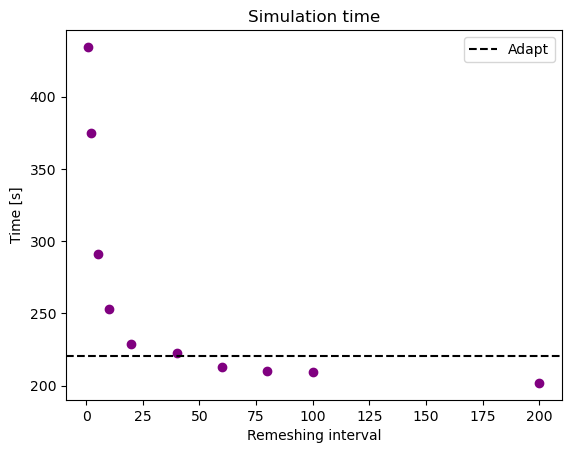

Text(0.5, 1.0, 'Remeshing time')

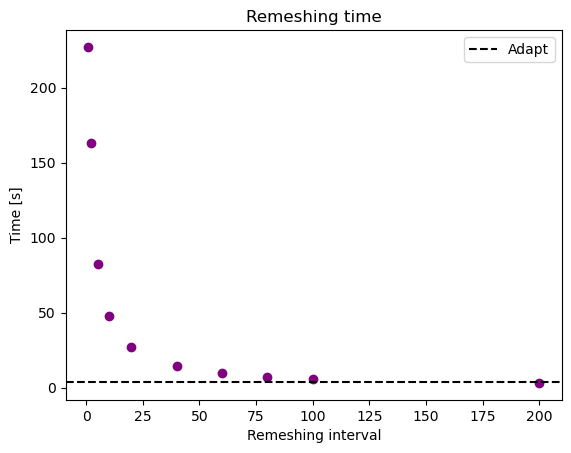

In [6]:
plt.scatter(Remeshing_interval,np.array(Sim_times)/1000,color='purple')
plt.axhline(Time_adapt/1000,color='black',ls='dashed',label='Adapt')
plt.xlabel("Remeshing interval")
plt.ylabel("Time [s]")
plt.legend()
plt.title("Simulation time")
plt.show()
plt.axhline(Remesh_adap/1000,color='black',ls='dashed',label='Adapt')
plt.scatter(Remeshing_interval,np.array(Remeshing_times)/1000,color='purple')
plt.xlabel("Remeshing interval")
plt.ylabel("Time [s]")
plt.legend()
plt.title("Remeshing time")

In [7]:
Step_at_remesh = []
Operations_at_step = []
Final_E = []
for i in range(1,11):
    Remesher_info  = np.loadtxt(Results_dir + "{}/Remeshing_count.txt".format(i),skiprows=1)
    Step_at_remesh.append(Remesher_info[:,0])
    Operations_at_step.append(Remesher_info[:,1])
    Output = np.loadtxt(Results_dir + "{}/Output_data.txt".format(i),skiprows=1)
    Final_E.append(Output[-1,8])



In [19]:
Output = np.loadtxt(Results_dir + "11/Output_data.txt",skiprows=1)
Final_E_adapt = Output[-1,8]
Remesher_info  = np.loadtxt(Results_dir + "11/Remeshing_count.txt".format(i),skiprows=1)



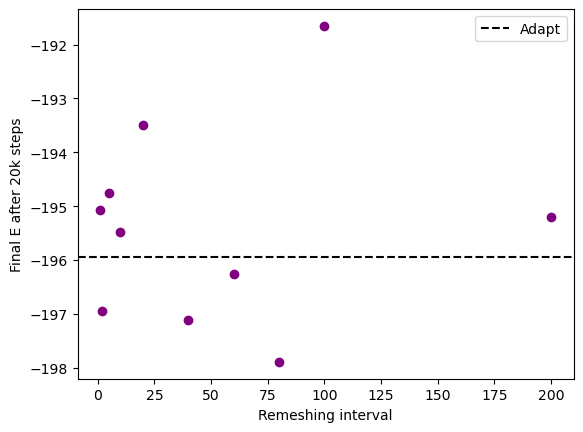

In [14]:
plt.scatter(Remeshing_interval,Final_E,color='purple')
plt.xlabel("Remeshing interval")
plt.ylabel("Final E after 20k steps")
plt.axhline(Final_E_adapt,color='black', ls='dashed',label='Adapt')
plt.legend()

plt.plot()

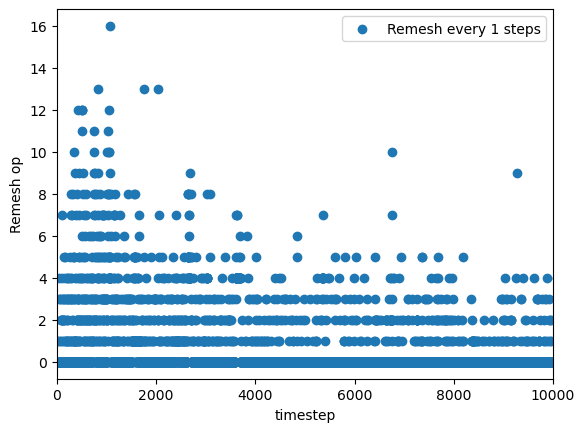

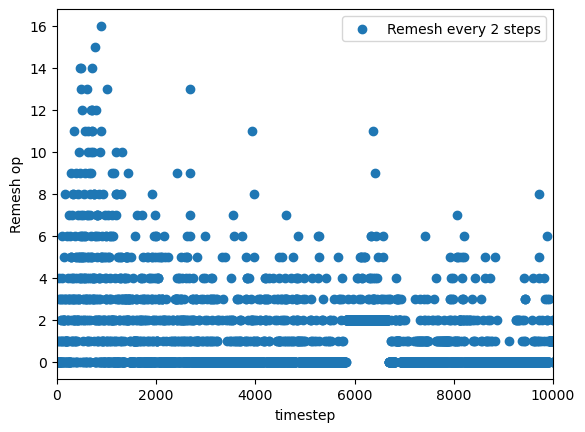

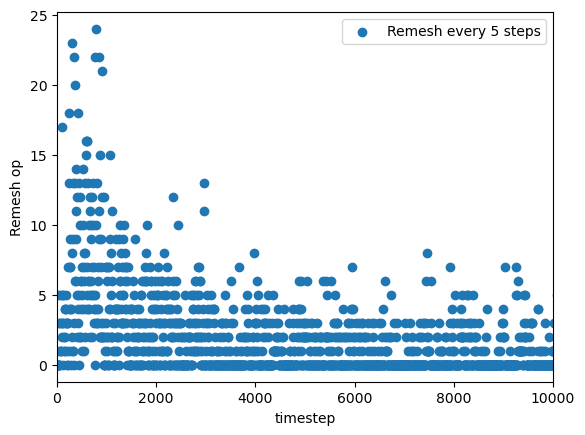

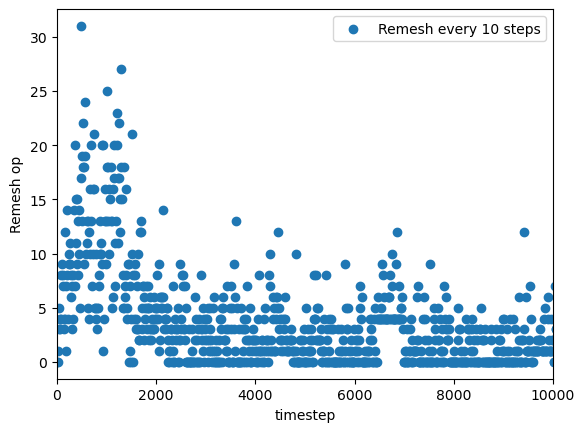

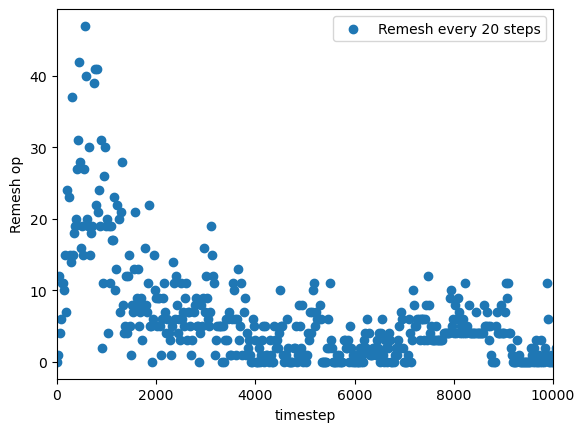

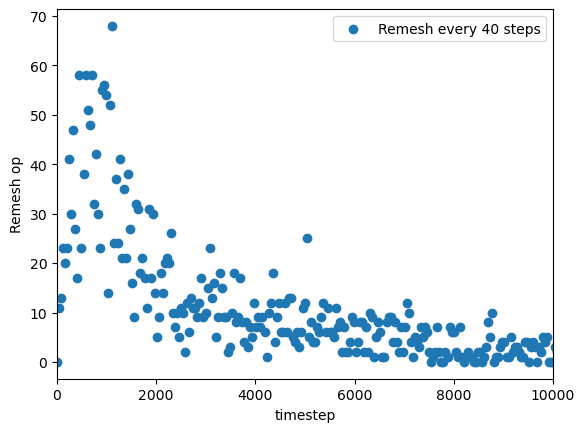

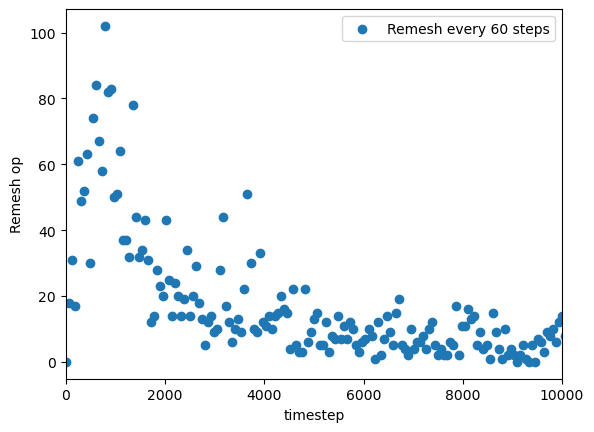

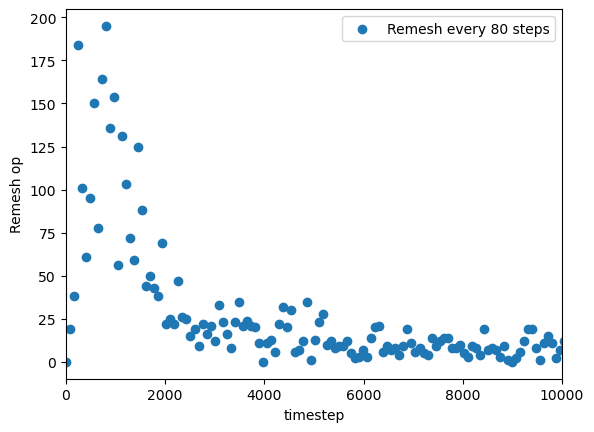

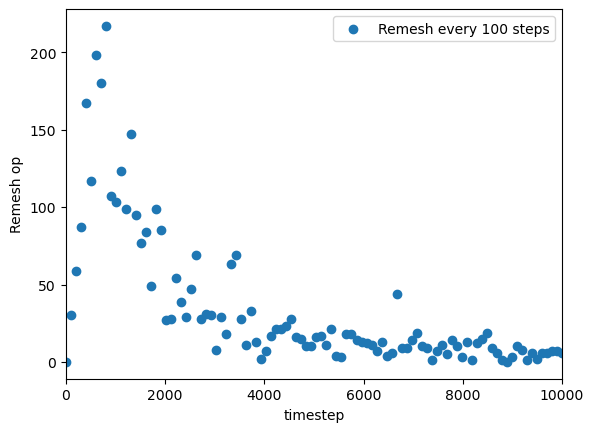

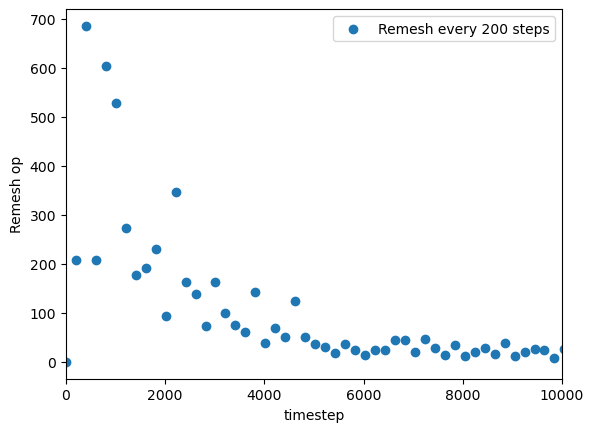

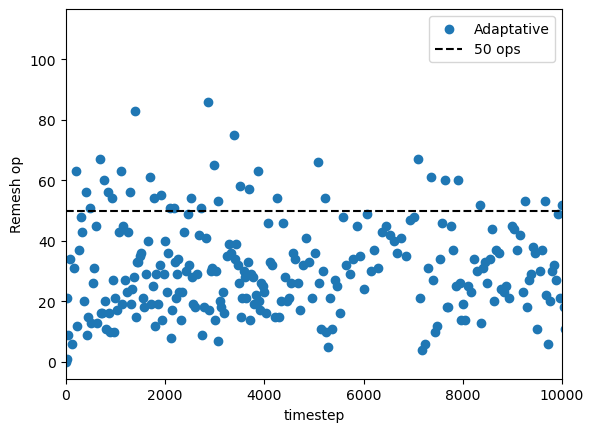

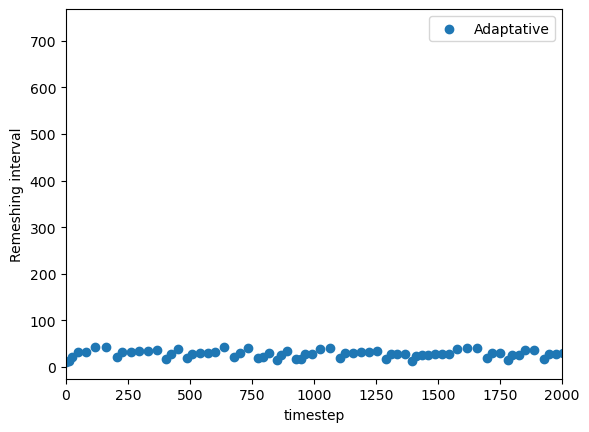

In [27]:
for i in range(len(Remeshing_interval)):
    plt.scatter(Step_at_remesh[i],Operations_at_step[i],label="Remesh every {} steps".format(Remeshing_interval[i]))
    plt.xlim(0,10000)
    plt.legend()
    plt.xlabel("timestep")
    plt.ylabel("Remesh op")
    plt.show()
# plt.ylim(0,20)
# plt.xlim(0,500)
plt.scatter(Remesher_info[:,0],Remesher_info[:,1],label='Adaptative')
plt.xlim(0,10000)
plt.axhline(50,color='black', ls='dashed',label='50 ops')
plt.legend()
plt.xlabel("timestep")
plt.ylabel("Remesh op")
plt.show()
plt.scatter(Remesher_info[:,0],Remesher_info[:,2],label='Adaptative')
plt.xlim(0,2000)
# plt.axhline(50,color='black', ls='dashed',label='50 ops')
plt.legend()
plt.xlabel("timestep")
plt.ylabel("Remeshing interval")
plt.show()
# plt.show()

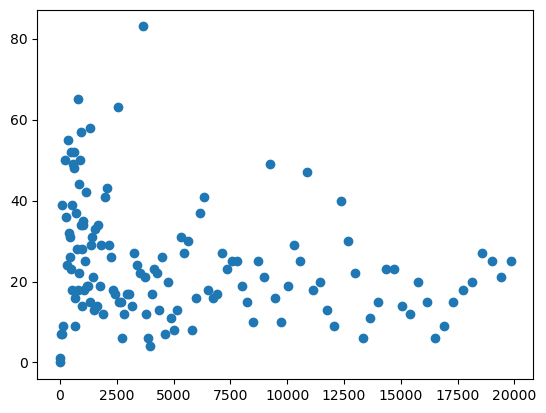

2
1


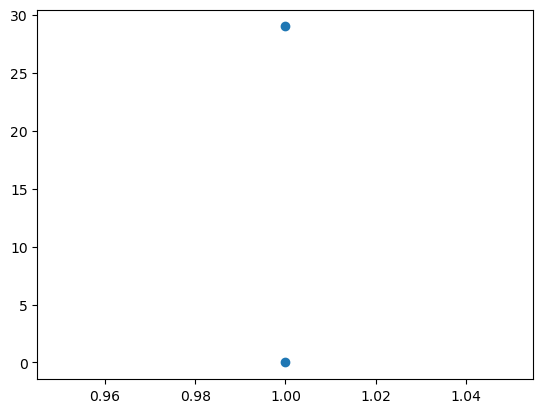

In [102]:
Zero_length_intervals =[]
N_oper_after = []

at_interval = False
count = 0
count_oper =0
for i in range(len(Remesher_info[:,1])):

    if(Remesher_info[i,1]< 1e-1):
        
        if(not(at_interval)):
            at_interval = True
            if(count_oper>0):
                N_oper_after.append(count_oper)
                count_oper=0

        count+=1
    else:
        if(at_interval):
            at_interval = False
            Zero_length_intervals.append(count)
            

            count_oper+= Remesher_info[i,1]
       
        count = 0
        
print(len(Zero_length_intervals))
print(len(N_oper_after))
N_oper_after.append(0)
plt.scatter(Zero_length_intervals,N_oper_after)

In [23]:
Results_dir = os.getcwd()+"/../Results/Two_beads_without_spring_outside_outside/Bending_20.0000_Volume_constraint_100000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_500.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_500.0000_Bonds_Harmonic_0.0000_Harmonic_0.0000_Switch_No_remesh_Nsim_1/"


In [25]:
Remesher_info  = np.loadtxt(Results_dir + "Remeshing_count.txt",skiprows=1)

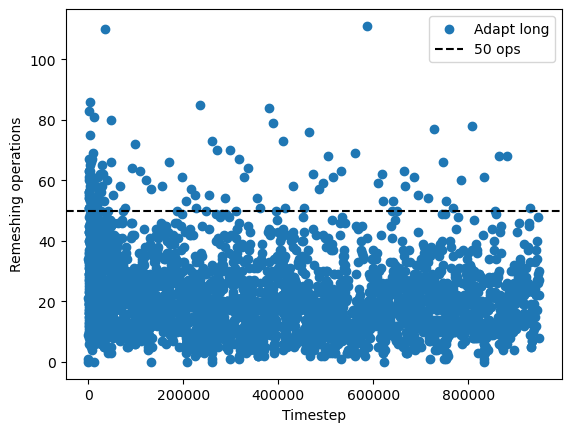

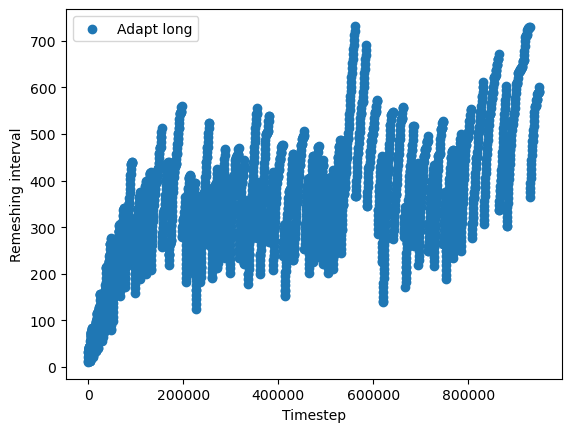

In [26]:
plt.scatter(Remesher_info[:,0],Remesher_info[:,1],label='Adapt long')
plt.xlabel("Timestep")
plt.ylabel("Remeshing operations")
plt.axhline(50,color='black', ls='dashed',label='50 ops')
plt.legend()
plt.show()
plt.scatter(Remesher_info[:,0],Remesher_info[:,2],label='Adapt long')
plt.ylabel("Remeshing interval")
plt.xlabel("Timestep")
plt.legend()
plt.show()
# plt.xlim(0,10000)
